In [67]:
from IPython.core.interactiveshell import InteractiveShell
# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"

## Resources
### General
- [NLP Project Repo](https://notebooks.quantumstat.com/)

### Preprocessing, Tokenizing & Embedding 
- [Huggingface tokenizer tutorial (medium)](https://heartbeat.fritz.ai/hands-on-with-hugging-faces-new-tokenizers-library-baff35d7b465)
- [Huggingface tokenizer tutorial (github)](https://github.com/huggingface/transformers/blob/master/notebooks/01-training-tokenizers.ipynb)
- [Vocab similarity of tokenizers](https://towardsdatascience.com/comparing-transformer-tokenizers-686307856955)
- [Embedding <-> Unknown Vocabulary Iteration (Kaggle)](https://www.kaggle.com/christofhenkel/how-to-preprocessing-when-using-embeddings)
- [Prepping for word2vec, with sequence padding](https://mlwhiz.com/blog/2019/01/17/deeplearning_nlp_preprocess/#embedding-enrichment)
- [Sentence Transformers (github)](https://github.com/UKPLab/sentence-transformers/blob/master/sentence_transformers/SentenceTransformer.py)
- [Fasttext sentence embeddings (medium)](https://towardsdatascience.com/super-easy-way-to-get-sentence-embedding-using-fasttext-in-python-a70f34ac5b7c)
- [Embedding Literature Review (Medium)](https://towardsdatascience.com/document-embedding-techniques-fed3e7a6a25d#d7eb)
- [BERT Embeddings Tutorial (Colab)](https://colab.research.google.com/drive/1ZQvuAVwA3IjybezQOXnrXMGAnMyZRuPU#scrollTo=EbS8_z6XMuTJ)

### Downstream tasks (classification, translation, question-answer, etc)
#### High-level APIs
- [Huggingface Pipeline Examples (Github)](https://github.com/huggingface/transformers/blob/master/notebooks/03-pipelines.ipynb)
-  [AdaptNLP Examples (Github)](https://github.com/Novetta/adaptnlp/tree/master/tutorials)

#### Clustering
- [Word2vec + K-means clusering](http://ai.intelligentonlinetools.com/ml/text-clustering-word-embedding-machine-learning/)

#### Classification
- [Adding vocab to transfer models](https://medium.com/modern-nlp/3-ways-to-make-new-language-models-f3642e3a4816)
- [Weak Supervision Example](https://www.topbots.com/nlp-classifiers-with-transfer-learning/)
- [Tween Classification, Long Read Comparing Transformers](https://towardsdatascience.com/transfer-learning-in-nlp-for-tweet-stance-classification-8ab014da8dde)
- [Multi-class text classfication](https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568)


#### NER  
[Unsupervised NER with BERT](https://towardsdatascience.com/unsupervised-ner-using-bert-2d7af5f90b8a)

## Testing high-level

- get data sample
- preprocess
- make embeddings
- check coverage
- get k-means, plot elbow
- PCA, tSNE

In [59]:
import pandas as pd
import numpy as np

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from adaptnlp import EasyWordEmbeddings, EasyStackedEmbeddings, EasyDocumentEmbeddings

In [4]:
#get data
df = pd.read_pickle('billings_sample')

In [5]:
df.head()

ticket_id                                               text  \
0     196950  Please have the email address changed for invo...   
1     196970  The quote screen is showing Employee Dishonest...   
2     197037  Do you have an address for payments? An insure...   
3     197096  Hello Good Morning! I need some help on a coup...   
4     197150  I have tried over and over to log into this si...   

        inquiry_type                                               tags  
0  billing_inquiries  [attune_insurance, billing_inquiries, updaed_i...  
1  billing_inquiries  [attune_insurance, billing_inquiries, broker_o...  
2  billing_inquiries  [attune_insurance, billing_inquiries, billing_...  
3  billing_inquiries  [appetite_change_2020, attune_insurance, billi...  
4  billing_inquiries  [attune_insurance, billing_inquiries, document...

In [7]:
df.iloc[0].text

'Please have the email address changed for invoice notifications to accounting@mavrealty.com for Mavworks, LLC account #2920493057. Please confirm the change. Thanks Yes, just all invoices and payments notices send to accounting@mavrealty.com Thanks'

### Word embeddings

In [ ]:
# Instantiate embeddings tagger
embeddings = EasyWordEmbeddings()

In [35]:
embeddings

In [9]:
# Get GPT2 embeddings of example text... A list of flair Sentence objects are generated
sentences = embeddings.embed_text(df.iloc[0].text, model_name_or_path="gpt2")

In [39]:
samp_sentence = sentences[0]
samp_sentence.__class__

flair.data.Sentence

In [38]:
samp_sentence

Sentence: "Please have the email address changed for invoice notifications to accounting@mavrealty.com for Mavworks, LLC account #2920493057. Please confirm the change. Thanks Yes, just all invoices and payments notices send to accounting@mavrealty.com Thanks" - 32 Tokens

In [17]:
samp_token = sentences[0][0]
samp_token.embedding.__class__

In [33]:
samp_sentence.tokens

[Token: 1 Please,
 Token: 2 have,
 Token: 3 the,
 Token: 4 email,
 Token: 5 address,
 Token: 6 changed,
 Token: 7 for,
 Token: 8 invoice,
 Token: 9 notifications,
 Token: 10 to,
 Token: 11 accounting@mavrealty.com,
 Token: 12 for,
 Token: 13 Mavworks,,
 Token: 14 LLC,
 Token: 15 account,
 Token: 16 #2920493057.,
 Token: 17 Please,
 Token: 18 confirm,
 Token: 19 the,
 Token: 20 change.,
 Token: 21 Thanks,
 Token: 22 Yes,,
 Token: 23 just,
 Token: 24 all,
 Token: 25 invoices,
 Token: 26 and,
 Token: 27 payments,
 Token: 28 notices,
 Token: 29 send,
 Token: 30 to,
 Token: 31 accounting@mavrealty.com,
 Token: 32 Thanks]

In [15]:
# Iterate through to access the embeddings
for token in sentences[0]:
    print(token.get_embedding())
    break

tensor([-0.3411, -1.7095, -0.2478,  ..., -0.7378, -0.0633,  0.2291])


### Doc embeddings

In [6]:
# Instantiate with variable number of language models
bert_bc_doc_embeddings = EasyDocumentEmbeddings("bert-base-cased")

May need a couple moments to instantiate...
Pooled embedding loaded
RNN embeddings loaded


In [13]:
#sample
df_frac = df.sample(frac=0.5).reset_index().copy()

In [15]:
# Document Pool embedding
pooled_sentences = bert_bc_doc_embeddings.embed_pool(df_frac.text.values.tolist())

In [34]:
samp_tensor = pooled_sentences[0].get_embedding()
samp_tensor

tensor([ 0.2234,  0.1451,  0.1567,  ...,  0.0784, -0.0342,  0.5374],
       grad_fn=<CatBackward>)

In [36]:
df_frac['em'] = pd.Series(pooled_sentences).map(lambda x: x.get_embedding().data.numpy())

In [37]:
df_frac.head(2)

index  ticket_id                                               text  \
0    128     203179  If a client's insurance is paid through an esc...   
1    272     213325  Hi Good morning Hi Mellisa Could you please he...   

        inquiry_type                                               tags  \
0  billing_inquiries  [attune_insurance, billing_inquiries, billing_...   
1  billing_inquiries  [attune_insurance, automatic_payment_status, b...   

                                                  em  
0  [0.22336219, 0.14508489, 0.15671737, 0.0455582...  
1  [0.17254572, -0.06349251, 0.27432993, 0.255870...

### Similarity


In [114]:
from scipy.spatial.distance import cosine

In [116]:
df_frac.em[0]

array([ 0.22336219,  0.14508489,  0.15671737, ...,  0.07841588,
       -0.0342476 ,  0.53737456], dtype=float32)

In [123]:
print(df_frac.text[0])
print()
for i in range(1,5):
    print(f"Score: {1 - cosine(df_frac.em[0], df_frac.em[i])}")
    print(df_frac.text[i])
    print('-'*10)

If a client's insurance is paid through an escrow account. How can I get a copy of an invoice with a mailing address so that mortgagee can mail payment? Hello.

Score: 0.9134382009506226
Hi Good morning Hi Mellisa Could you please help me confirm if this account is enrolled in automatic payments GP Aventura Commons LLC LONMIG00001HIP-691-01
----------
Score: 0.9086475968360901
can you resend the email with the invoice for 8817844696? Jon B. DeCamilla? It needs to go to Sheila@arjrc.com Thank you.
----------
Score: 0.9397527575492859
I received a phone call from one of our insured's that there was a payment drafted from his bank under the name SEARS in the exact amount that was supposed to be drafted. would you be able to provide me with the name it should be under the statement as?
----------
Score: 0.9040750861167908
Acct # 1999850063 DANIEL &amp; IRENE CORPORATION What's the due dates for the next 3 payments? Hi Please let me know the due dates for the new 3 payments for this account

### K-means

In [68]:
df_frac.em.values.shape
df_frac.em[0].shape

(209,)

(3072,)

In [77]:
X = np.array(df_frac.em.values.tolist())

In [84]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(10,50,5)

In [85]:
import time

In [86]:
for k in K:
    time_start = time.time()
    km = KMeans(n_clusters=k, random_state=0, n_init=20, max_iter=400)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    print(f'kmeans {k} done! Time elapsed: {time.time()-time_start} seconds')

kmeans 10 done! Time elapsed: 0.9104702472686768 seconds
kmeans 15 done! Time elapsed: 1.1056501865386963 seconds
kmeans 20 done! Time elapsed: 1.3078958988189697 seconds
kmeans 25 done! Time elapsed: 1.4413650035858154 seconds
kmeans 30 done! Time elapsed: 1.6373608112335205 seconds
kmeans 35 done! Time elapsed: 1.8255531787872314 seconds
kmeans 40 done! Time elapsed: 2.0344078540802 seconds
kmeans 45 done! Time elapsed: 2.3507931232452393 seconds


<IPython.core.display.Javascript object>


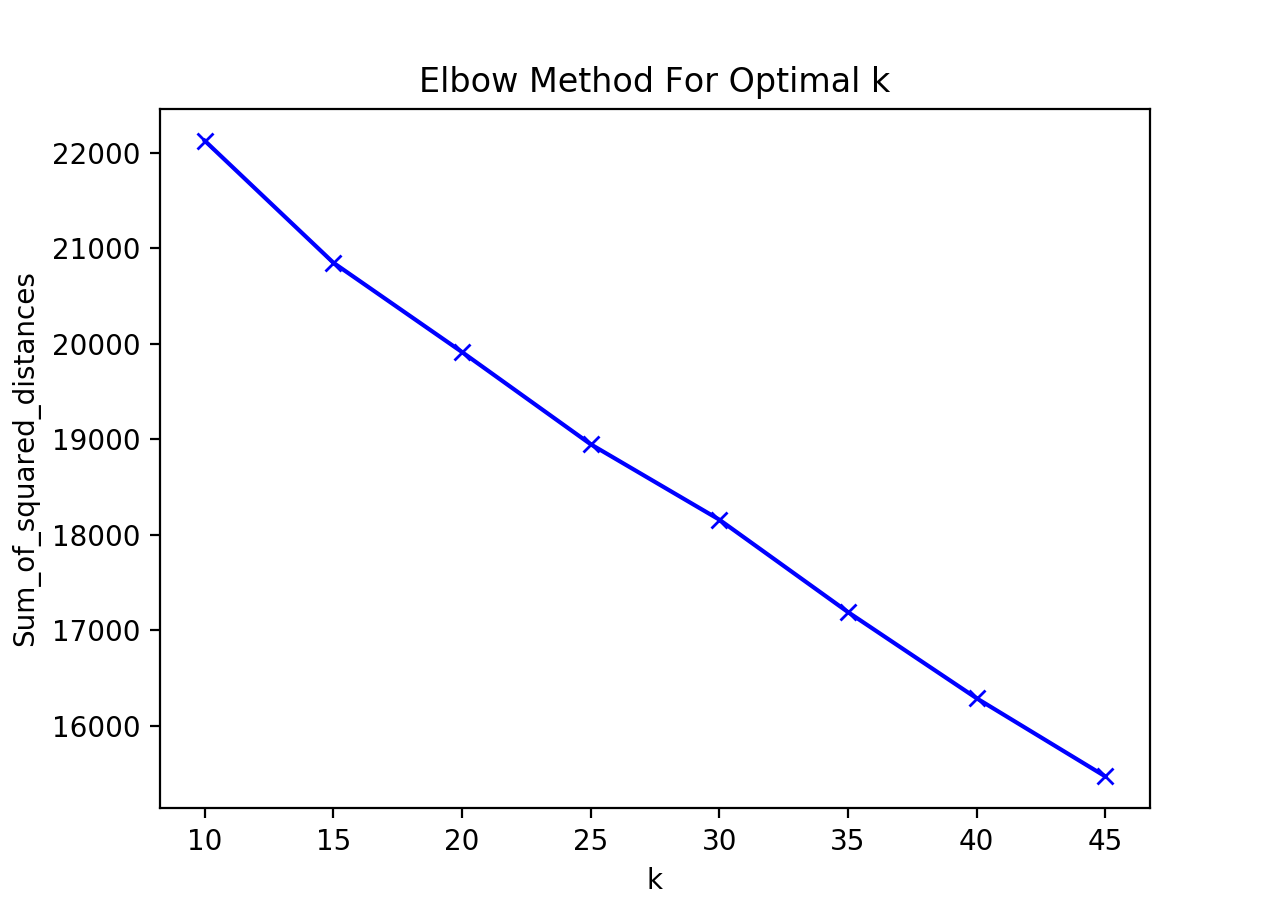

Text(0.5, 0, 'k')

Text(0, 0.5, 'Sum_of_squared_distances')

Text(0.5, 1.0, 'Elbow Method For Optimal k')

In [88]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### PCA + tSNE

In [96]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [90]:
pca = PCA(n_components=50)

In [92]:
X_p = pca.fit_transform(X)

In [95]:
X_p.shape

(209, 50)

tSNE

In [99]:
def get_tsne_embeddings(vectorized_data):
    """
    Perform t-SNE embeddings for different perplexity levels.
    
    Args:
        vectorized_data (numpy sparse matrix): m samples x n features, 
            from vectorizer.fit_transform() output

    Returns:
        out_dict (dict of numpy matrix): 
            m samples x n_components (embedding dimension)

    """
    perplexities = [10, 30, 55]
    out_dict = {}
    for p in perplexities:
        tsne = TSNE(n_components=2, verbose=1, n_iter=3000, perplexity=p)
        print('-'*10)
        print(f'PERPLEXITY: {p}')
        time_start = time.time()
        tsne_results = tsne.fit_transform(vectorized_data)
        print(f'DONE! Time elapsed: {time.time()-time_start} seconds')
        out_dict.update({str(p):tsne_results})
    return out_dict

In [100]:
tsne_results = get_tsne_embeddings(X_p)

----------
PERPLEXITY: 10
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 209 samples in 0.005s...
[t-SNE] Computed neighbors for 209 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 209 / 209
[t-SNE] Mean sigma: 3.186325
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.233986
[t-SNE] KL divergence after 2900 iterations: 1.215355
DONE! Time elapsed: 1.4878690242767334 seconds
----------
PERPLEXITY: 30
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 209 samples in 0.000s...
[t-SNE] Computed neighbors for 209 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 209 / 209
[t-SNE] Mean sigma: 4.033173
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.678383
[t-SNE] KL divergence after 1200 iterations: 0.913321
DONE! Time elapsed: 0.6769800186157227 seconds
----------
PERPLEXITY: 55
[t-SNE] Computing 166 nearest neighbors...
[t-SNE] Indexed 209 samples in 0.000s...
[t-SNE] Computed

In [101]:
tsne_dfs = pd.concat([pd.DataFrame(data,
                                  columns=['_'.join([i, col_suffix])
                                           for i in ['x', 'y']]
                                  ) for col_suffix, data in tsne_results.items()
                     ],
                    axis=1)

In [102]:
df_frac = pd.concat([df_frac, tsne_dfs], axis=1)

In [103]:
df_frac.head()

index  ticket_id                                               text  \
0    128     203179  If a client's insurance is paid through an esc...   
1    272     213325  Hi Good morning Hi Mellisa Could you please he...   
2     15     197871  can you resend the email with the invoice for ...   
3    148     204015  I received a phone call from one of our insure...   
4    122     202890  Acct # 1999850063 DANIEL &amp; IRENE CORPORATI...   

        inquiry_type                                               tags  \
0  billing_inquiries  [attune_insurance, billing_inquiries, billing_...   
1  billing_inquiries  [attune_insurance, automatic_payment_status, b...   
2  billing_inquiries  [attune_insurance, billing_inquiries, document...   
3  billing_inquiries  [attune_insurance, billing_inquiries, zopim_ch...   
4  billing_inquiries  [attune_insurance, automatic_payment_status, b...   

                                                  em       x_10       y_10  \
0  [0.22336219, 0.14508489, 0.15671737, 0.0455582...  17.599848 -28.659313   
1  [0.17254572, -0.06349251, 0.27432993, 0.255870... -35.733894 -16.589176   
2  [0.17619726, 0.27733868, 0.15473461, 0.2556842... -27.911806 -21.091076   
3  [0.15752022, 0.009742981, 0.20094572, 0.104381...   5.267643 -29.443485   
4  [-0.081893474, 0.11223219, 0.07926673, 0.19759... -37.690865  14.156948   

       x_30      y_30      x_55      y_55  
0 -9.216881 -0.462965  1.826773 -4.898782  
1  4.017552  0.029292 -1.140478 -0.310767  
2  5.417704 -3.677981 -2.935918 -2.853581  
3 -2.631338 -3.814371  0.446334 -3.928776  
4 -7.028402 -7.718129  4.785132 -2.919009

In [109]:
import json
import seaborn as sns

//anaconda3/envs/zendesk/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1152x504 with 0 Axes>

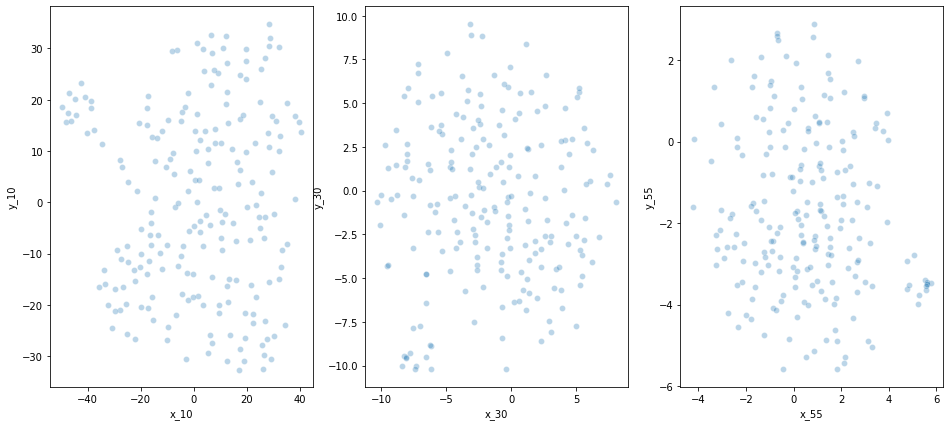

In [111]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="x_10", y="y_10",
#     hue="k3",
    palette=sns.color_palette("hls", 3),
    data=df_frac,
    legend="full",
    alpha=0.3
)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="x_30", y="y_30",
#     hue="k4",
    palette=sns.color_palette("hls", 4),
    data=df_frac,
    legend="full",
    alpha=0.3
)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="x_55", y="y_55",
#     hue="k5",
    palette=sns.color_palette("hls", 5),
    data=df_frac,
    legend="full",
    alpha=0.3
)

- use vocabulary coverage to find a good embedding
- start labeling process